In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
matches = pd.read_csv('./dataset/atp_matches_till_2022.csv')
players = pd.read_csv('./dataset/atp_players_till_2022.csv')
rankings = pd.read_csv('./dataset/atp_rankings_till_2022.csv')
tanishq_results = pd.read_csv('./dataset/tanishq_data.csv')

In [5]:
print(matches.keys())
print(players.keys())
print(rankings.keys())
matches.head()

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')
Index(['player_id', 'name_first', 'name_last', 'hand', 'dob', 'ioc', 'height',
       'wikidata_id'],
      dtype='object')
Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,112411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Cleaning the data.... 
matches_dropset = ['tourney_name', 'surface', 'draw_size', 'winner_seed', 'winner_entry',
       'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_seed', 'loser_entry', 'loser_hand', 'loser_ht', 
       'loser_ioc', 'loser_age', 'winner_rank_points', 'loser_rank_points', 'round','minutes', 'w_ace', 'w_df', 
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank']
try:
       matches.drop(matches_dropset,inplace=True,axis=1)
except Exception as e:
       print("Keys not found")

# check if identifier is unique (can be used as primary key)
primary_keys = []
for k in matches.keys():
       if matches[k].is_unique:
              primary_keys.append(k)
print('All keys', matches.keys())
print('Primary keys',primary_keys)
matches.loc[20]


All keys Index(['tourney_id', 'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_name', 'loser_id', 'loser_name', 'score', 'best_of'],
      dtype='object')
Primary keys []


tourney_id          1968-2029
tourney_level               A
tourney_date         19680708
match_num                 290
winner_id              109813
winner_name      Ken Fletcher
loser_id               209523
loser_name       Cecil Pedlow
score                 6-1 6-0
best_of                     3
Name: 20, dtype: object

In [7]:
md = matches.to_dict()
data = {}
for i in md['tourney_id'].keys():
    data[md['tourney_date'][i]*1000 + md['match_num'][i]] = md
dataset = pd.DataFrame.from_dict(md)
primary_keys = []
for k in dataset.keys():
       if dataset[k].is_unique:
              primary_keys.append(k)
print('All keys', dataset.keys())
print('Primary keys',primary_keys)
dataset


All keys Index(['tourney_id', 'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_name', 'loser_id', 'loser_name', 'score', 'best_of'],
      dtype='object')
Primary keys []


,tourney_id,tourney_level,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,best_of
0,1968-2029,A,19680708,270,112411,Douglas Smith,110196,Peter Ledbetter,6-1 7-5,3
1,1968-2029,A,19680708,271,126914,Louis Pretorius,209536,Maurice Pollock,6-1 6-1,3
2,1968-2029,A,19680708,272,209523,Cecil Pedlow,209535,John Mulvey,6-2 6-2,3
3,1968-2029,A,19680708,273,100084,Tom Okker,209534,Unknown Fearmon,6-1 6-1,3
4,1968-2029,A,19680708,274,100132,Armistead Neely,209533,Harry Sheridan,6-2 6-4,3
...,...,...,...,...,...,...,...,...,...,...
188156,2022-M-DC-2022-WG2-PO-GRE-JAM-01,D,20220304,4,209362,Aristotelis Thanos,209080,Blaise Bicknell,6-4 6-4,3
188157,2022-M-DC-2022-WG2-PO-GRE-JAM-01,D,20220304,5,202065,Petros Tsitsipas,202120,Rowland Phillips,4-6 6-4 6-4,3
188158,2022-M-DC-2022-WG2-PO-HKG-BEN-01,D,20220304,1,138846,Hong Kit Jack Wong,105278,Alexis Klegou,1-6 6-4 4-1 RET,3
188159,2022-M-DC-2022-WG2-PO-HKG-BEN-01,D,20220304,2,209409,Coleman Wong,200583,Delmas Ntcha,6-4 6-4,3


In [8]:
class Player:
    def __init__(self,player_id,player_name):
        self.id = player_id
        self.name = player_name
        self.rating = 1500 # initial Elo rating 
        self.surface_rating = {'hard':1500,'clay':1500,'grass':1500}
        self.matches = []
        self.wins = 0
        self.lose = 0
        self.times = []
        self.index = 0
        self.last_match = -1
    
    def updateTime(self,time):
        if len(self.times) < 10:
            self.times.append(time)
        else:
            self.times[self.index] = time
            self.index += 1
            self.index %= 10
        csum = 0
        for i in self.times:
            csum += i
        csum /= len(self.times)
        self.last_match = csum 

    def updateProfile(self,score:list,result:str,opponent):
        matches.append((opponent.id,score))


# Elo Details

## Penalty for Missing Matches 



In [9]:
from enum import Enum

class EloType(Enum):
    vanilla = 'vanilla'
    continuous = 'continuous'
    temporal_vanilla = 'temporal-vanilla'
    temporal_continuous = 'temporal-continuous'

class Elo:
    def __init__(self,elo_type=EloType.vanilla):
        self.base = 10.0 
        self.const = 400.0 
        self.k = 8
        self.__elo_type = elo_type
    '''
        delta is the rating difference in the current match's performance
    '''
    def predict(self,delta):
        return 1 / (1 + self.base**(delta/self.const))
        

    def vanilla_elo(self,old_ratings, delta, result,time=1):
        ea = 1 / (1 + self.base**(delta/self.const))
        return old_ratings + self.k*(result - ea)

    def temporal_elo(self,old_ratings, delta, result,time_k=1):
        ea = 1 / (1 + self.base**(delta/self.const))
        return old_ratings + self.k*time_k*(result - ea)

    def elo_rate(self,old_ratings,delta,result,time=1):
        if old_ratings > 2400:
            self.k = 4 
        else:
            self.k = 8
        if self.__elo_type == EloType.vanilla:
            return self.vanilla_elo(old_ratings,delta,result,time)
        if self.__elo_type == EloType.temporal_continuous:
            return self.temporal_elo(old_ratings,delta,result,np.log(time))

In [10]:
# dataset.loc[20]
dataset.loc[dataset.shape[0]-1]
# dataset.shape[0]

tourney_id       2022-M-DC-2022-WG2-PO-HKG-BEN-01
tourney_level                                   D
tourney_date                             20220304
match_num                                       4
winner_id                                  208414
winner_name                      Sylvestre Monnou
loser_id                                   207132
loser_name                             Ki Lung Ng
score                                     6-4 6-4
best_of                                         3
Name: 188160, dtype: object

In [10]:
freq = {}
freq[3] = 0
freq[5] = 0
freq[1] = 0

for i in range(dataset.shape[0]):
    freq[dataset.loc[i]['best_of']] += 1
for i in freq.keys():
    print(i,freq[i])

3 146597
5 41537
1 27


In [42]:
def parse_score(score:str):
    sc = []
    for st in score.split(' '):
        sc.append([0,0])
        idx = 0
        for pt in st.split('-'):
            sc[-1][idx] = int(pt)
            idx+=1
    return sc



def get_rating(score:list):
    winner = 0
    score_p0 = 0
    score_p1 = 0
    for st in score:
        if st[0] > st[1]:
            winner += 1
            score_p0 = 130 - (10*st[1])
            score_p1 = 10*st[1]
        else:
            score_p1 = 130 - (10*st[0])
            score_p0 = 10*st[0]
    if winner >= 2:
        winner = 0
        score_p0 += 200 
    else:
        winner = 1
        score_p1 += 200
    if len(score) == 2:
        if winner == 0:
            score_p0 += 140
        else:
            score_p1 += 140
    return (score_p0,score_p1)



In [12]:
def date_parser(date:int):
    yr = date/10000
    month = (date%10000)/100
    day = (date%100)
    time_score = (yr - 1950)*365 + (month-1)*30 + day
    return time_score


In [43]:
players = {}
prat = {}
plerr = {}
eloObj = Elo()
name_id = {}
print(dataset.shape[0])
for i in range(dataset.shape[0]):
    pdone = int(100*i/dataset.shape[0])
    # print('\r',pdone,end=' ')
    # print('\r[',pdone*'=',(100-pdone)*'-',']',pdone,'\%',sep='',end='')
    mtch = dataset.loc[i]
    if mtch['tourney_level'] != 'A':
        continue
    name_id[mtch['winner_name']] = mtch['winner_id']
    if mtch['winner_name'] not in players.keys():
        players[mtch['winner_name']] = Player(mtch['winner_id'],mtch['winner_name'])
        prat[mtch['winner_name']] = [1500]
        plerr[mtch['winner_name']] = [0]
    if mtch['loser_name'] not in players.keys():
        players[mtch['loser_name']] = Player(mtch['loser_id'],mtch['loser_name'])
        prat[mtch['loser_name']] = [1500]
        plerr[mtch['loser_name']] = [0]
    
    # difference in timing...
    dscore = date_parser(mtch['tourney_date'])
    if players[mtch['loser_name']].last_match == -1:
        players[mtch['loser_name']].last_match = dscore
    if players[mtch['winner_name']].last_match == -1:
        players[mtch['winner_name']].last_match = dscore
    k_loser = dscore - players[mtch['loser_name']].last_match
    k_winner = dscore - players[mtch['winner_name']].last_match

    players[mtch['loser_name']].updateTime(dscore)
    players[mtch['winner_name']].updateTime(dscore)
    delta = players[mtch['winner_name']].rating - players[mtch['loser_name']].rating
    # predict result of the match 
    pred = eloObj.predict(delta) # probability of a person with rating ``advantage`` DELTA winning?? 
    try:
        # get result of the match (statistically)
        match_ratings = get_rating(parse_score(mtch['score']))
    except Exception as e:
        # print("Skipped ",mtch)
        continue
    winner_stat = max(match_ratings[0],match_ratings[1])/(float(match_ratings[0]) + match_ratings[1])
    loser_stat = 1 - winner_stat

    plerr[mtch['loser_name']].append(abs(pred - loser_stat))        # might need to change this 
    plerr[mtch['winner_name']].append(abs(1 - pred - winner_stat))  # might need to change this 

    players[mtch['winner_name']].rating = eloObj.elo_rate(players[mtch['winner_name']].rating,delta,winner_stat,k_winner)
    players[mtch['winner_name']].wins +=1 
    players[mtch['loser_name']].rating = eloObj.elo_rate(players[mtch['loser_name']].rating,delta,loser_stat,k_loser)
    players[mtch['loser_name']].lose += 1
    prat[mtch['loser_name']].append(players[mtch['loser_name']].rating)
    prat[mtch['winner_name']].append(players[mtch['winner_name']].rating)

188161


Novak Djokovic 2303.041483035549
Roger Federer 2588.415983058385
Rafael Nadal 2506.375660740855


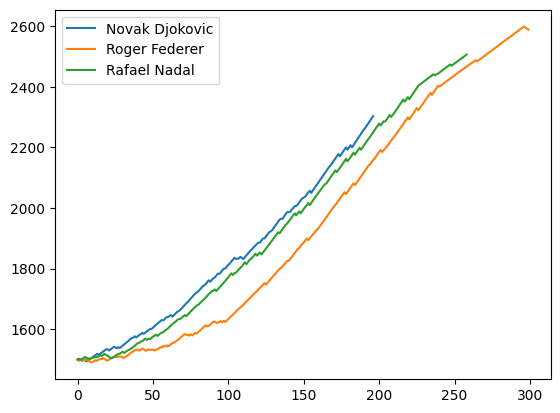

In [44]:
def plotPlayer(name:str):
    if name not in prat.keys():
        print('ERROR: Name not found')
        return 
    plt.plot(range(len(prat[name])),prat[name],label=name)
    print(name,prat[name][-1])
    # plt.show()
    return
plotPlayer('Novak Djokovic')
plotPlayer('Roger Federer')
plotPlayer('Rafael Nadal')
plt.legend()
plt.show()

In [45]:
tosee = {}
maxIndex = -1
for i in prat.keys():
    if len(prat[i]) not in tosee.keys():
        tosee[len(prat[i])] = [] 
    tosee[len(prat[i])].append(i)
    if len(prat[i]) >= 300 and (maxIndex == -1 or len(tosee[maxIndex]) < len(tosee[len(prat[i])])):
        maxIndex = len(prat[i])
print(tosee)
print(tosee.keys())
print(maxIndex)


{8: ['Douglas Smith', 'Tomas Lynch', 'Giuseppe Merlo', 'Detler Herdy', 'Bernd Kube', 'Manlio Bartoni', 'Alexander Marcial', 'Roberto Saya', 'Rudy Hernando', 'James Pressly', 'Alfred Schwartz', 'Dave Simmonds', 'Chuck Mckinley', 'Sever Dron', 'Vicente Zarazua', 'Jan Hajer', 'Nick Fleury', 'Bob Alloo', 'Don Turner', 'Anatoli Volkov', 'Geoffrey Olsson', 'William Mason', 'Hector Romani', 'Gaurav Misra', 'Ralph Geiger', 'Alberto Martorell', 'Salvador Cabeza', 'Joel Ross', 'Pierre Joly', 'Robert Casey C100', 'Gunther Gnettner', 'Takao Yamamoto', 'Phil Siviter', 'Peter Langsford', 'Patrice Hagelauer', 'Adolfo Gonzalez', 'Regis Brunet', 'Fabrizio Fanucci', 'Franco Merlone', 'Cary Leeds', 'Famiano Meneschincheri', 'Filip Krajcik', 'Frank Puncec', 'Ney Keller', 'Marco Armellini', 'Hans Hansson', 'Phil Lehnhoff', 'Hitoshi Shirato', 'David Macpherson', 'Michele Fioroni', 'Thierry Pham', 'Nick Fulwood', 'George Bezecny', 'James Turner', 'Andrew Burrow', 'Laurent Prades', 'Scott Warner', 'Alexis Hom

['Rafael Nadal', 'Novak Djokovic', 'Roger Federer']
Rafael Nadal 222 36
Novak Djokovic 173 23
Roger Federer 254 45


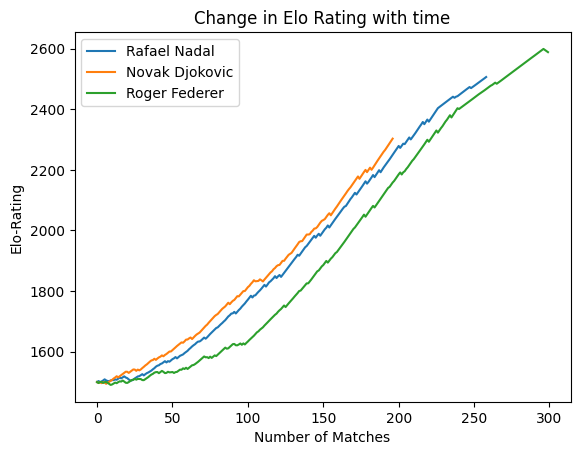

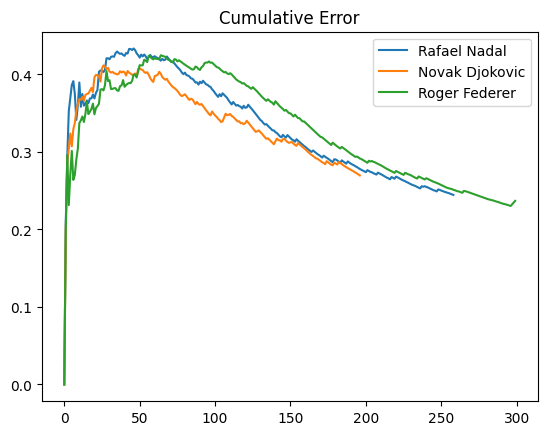

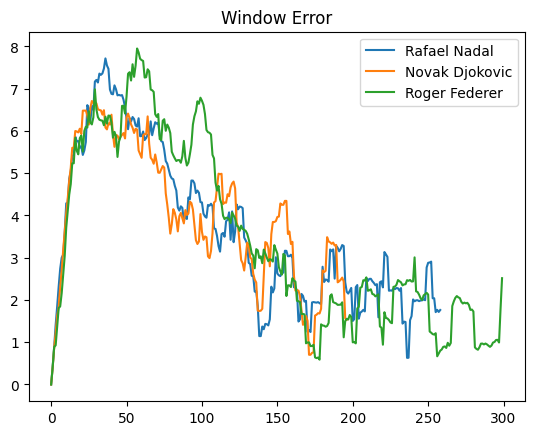

In [46]:
indx = 324

ppl = ['Rafael Nadal', 'Novak Djokovic', 'Roger Federer']
print(ppl)
for i in ppl:
    print(i,players[i].wins,players[i].lose)
    # plotPlayer(i)
    plt.plot(range(len(prat[i])),prat[i],label=i)
plt.title('Change in Elo Rating with time')
plt.xlabel('Number of Matches')
plt.ylabel('Elo-Rating')
plt.legend()
plt.show()
# cumulative error 
for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in plerr[i]:
        if len(nmat) == 0:
            nmat.append(x)
        else:
            nmat.append((x+nmat[-1]*len(nmat))/(len(nmat) + 1))
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Cumulative Error')
plt.legend()
plt.show()


# window error  
window_size = 15 
for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in range(len(plerr[i])):
        if x < window_size:
            y = 0
            ans = 0
            while y <= x:
                ans += plerr[i][y]
                y += 1
            nmat.append(ans)
        else:
            ans = 0
            y = 0 
            while y < window_size:
                y += 1
                ans += plerr[i][x - y]
            nmat.append(ans)
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Window Error')
plt.legend()
plt.show()




In [22]:
fp = open('./dataset/rating_output.csv','a')
fp.write('ID,Rating\n')
id_name = {}
for i in name_id.keys():
    id_name[name_id[i]] = i
    fp.write(f'{name_id[i]},{prat[i][-1]}\n')
fp.close()

In [34]:
glk_results = pd.read_csv('./dataset/player_predictions.csv')
glk_results.sort_values(by=['tourney_date'])
pred_error1 = {}
pred_rating1 = {}
for i in range(glk_results.shape[0]):
    entry = glk_results.loc[i]
    player_name = id_name[entry['player_id']]
    if player_name not in pred_rating1.keys():
        pred_rating1[player_name] = []
        pred_error1[player_name] = []
    pred_rating1[player_name].append(entry['player_rating'])
    pred_error1[player_name].append(entry['prediction_error'])


    


Novak Djokovic 2220.6326886194843
Roger Federer 2528.703739149005
Rafael Nadal 2456.3567173416322


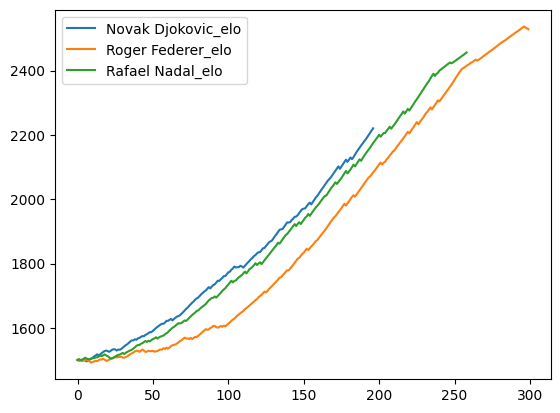

In [39]:
def plotPlayer(name:str):
    if name not in prat.keys():
        print('ERROR: Name not found')
        return 
    plt.plot(range(len(prat[name])),prat[name],label=name+'_elo')
    # plt.plot(range(len(pred_rating1[name])),pred_rating1[name],label=name+'_glk')
    print(name,prat[name][-1])
    # plt.show()
    return
plotPlayer('Novak Djokovic')
plotPlayer('Roger Federer')
plotPlayer('Rafael Nadal')
plt.legend()
plt.show()

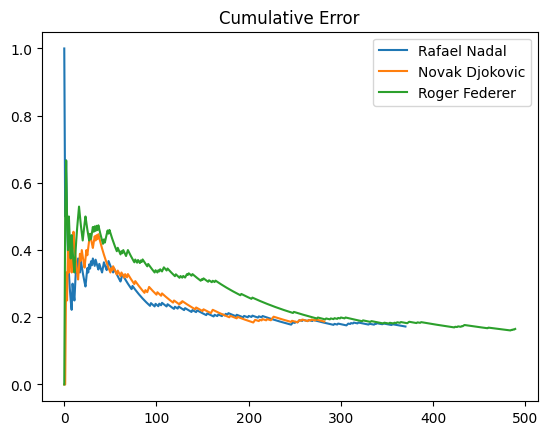

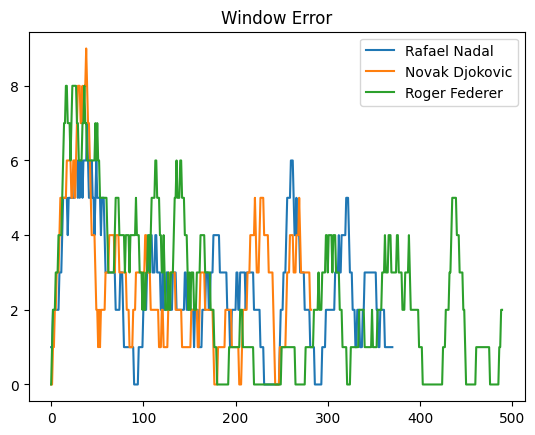

In [37]:
def plotError(name:str):
    if name not in plerr.keys():
        print('ERROR: Name not found')
        return 
    # plt.plot(range(len(plerr[name])),plerr[name],label=name+'_elo')
    plt.plot(range(len(pred_error1[name])),pred_error1[name],label=name+'_glk')
    print(name,prat[name][-1])
    # plt.show()
    return


for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in pred_error1[i]:
        if len(nmat) == 0:
            nmat.append(x)
        else:
            nmat.append((x+nmat[-1]*len(nmat))/(len(nmat) + 1))
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Cumulative Error')
plt.legend()
plt.show()


# window error  
window_size = 15 
for i in ppl:
    # plotPlayer(i)
    nmat = []
    for x in range(len(pred_error1[i])):
        if x < window_size:
            y = 0
            ans = 0
            while y <= x:
                ans += pred_error1[i][y]
                y += 1
            nmat.append(ans)
        else:
            ans = 0
            y = 0 
            while y < window_size:
                y += 1
                ans += pred_error1[i][x - y]
            nmat.append(ans)
    plt.plot(range(len(nmat)),nmat,label=i)
plt.title('Window Error')
plt.legend()
plt.show()







# plotError('Novak Djokovic')
# plotError('Roger Federer')
# plotError('Rafael Nadal')
# plt.legend()
# plt.show()